In [11]:
import os
import datetime
import itertools

import pandas as pd
import numpy as np
from sklearn import metrics

# Analysis of sameple

In [71]:
INPUT_CSV = "../workspace/buildup_christianity_usa/christians_sample_incl_chatgpt.csv"
OUTPUT_FOLDER = "../workspace/buildup_christianity_usa/"

In [13]:
results_samples = pd.read_csv(INPUT_CSV)
results_samples["prompt_version"] = results_samples["prompt_version"].fillna("")
results_samples_2 = results_samples.copy()
results_samples_2["model_name"] = results_samples["model_name"] + "-" + results_samples["prompt_version"]
results_samples_2.head()

,Unnamed: 0,tweet_id,predicted_class,classifier_type,model_name,prompt_version,prediction_run_time
0,0,1648189850749751296,c-none,christianity,manual-,,2023-07-12 12:00:00
1,1,1662099067193942017,c-none,christianity,manual-,,2023-07-12 12:00:00
2,2,1663968055985315841,c-figures,christianity,manual-,,2023-07-12 12:00:00
3,3,1651349182425477120,c-none,christianity,manual-,,2023-07-12 12:00:00
4,4,1651352206065676289,c-figures,christianity,manual-,,2023-07-12 12:00:00


In [14]:
group = results_samples.groupby(["classifier_type", "model_name", "prompt_version", "predicted_class"])

In [15]:
group.count()

Unnamed: 0  \
classifier_type model_name           prompt_version predicted_class                
christianity    google/flan-t5-large no_examples    c-doubtful                23   
                                                    c-holidays                 4   
                                                    c-identities               3   
                                                    c-none                    14   
                                                    c-person                   9   
...                                                                          ...   
polarization    manual                              polar-harsh                2   
                                                    polar-incivility           2   
                                                    polar-none                38   
                                                    polar-stereotype           3   
                                                    porlar-distrust            1   

                                                                      tweet_id  \
classifier_type model_name           prompt_version predicted_class              
christianity    google/flan-t5-large no_examples    c-doubtful              23   
                                                    c-holidays               4   
                                                    c-identities             3   
                                                    c-none                  14   
                                                    c-person                 9   
...                                                                        ...   
polarization    manual                              polar-harsh              2   
                                                    polar-incivility         2   
                                                    polar-none              38   
                                                    polar-stereotype         3   
                                                    porlar-distrust          1   

                                                                      prediction_run_time  
classifier_type model_name           prompt_version predicted_class                        
christianity    google/flan-t5-large no_examples    c-doubtful                         23  
                                                    c-holidays                          4  
                                                    c-identities                        3  
                                                    c-none                             14  
                                                    c-person                            9  
...                                                                                   ...  
polarization    manual                              polar-harsh                         2  
                                                    polar-incivility                    2  
                                                    polar-none                         38  
                                                    polar-stereotype                    3  
                                                    porlar-distrust                     1  

[117 rows x 3 columns]

In [16]:
results_counts = group.count().reset_index()

In [17]:
results_counts.head()

,classifier_type,model_name,prompt_version,predicted_class,Unnamed: 0,tweet_id,prediction_run_time
0,christianity,google/flan-t5-large,no_examples,c-doubtful,23,23,23
1,christianity,google/flan-t5-large,no_examples,c-holidays,4,4,4
2,christianity,google/flan-t5-large,no_examples,c-identities,3,3,3
3,christianity,google/flan-t5-large,no_examples,c-none,14,14,14
4,christianity,google/flan-t5-large,no_examples,c-person,9,9,9


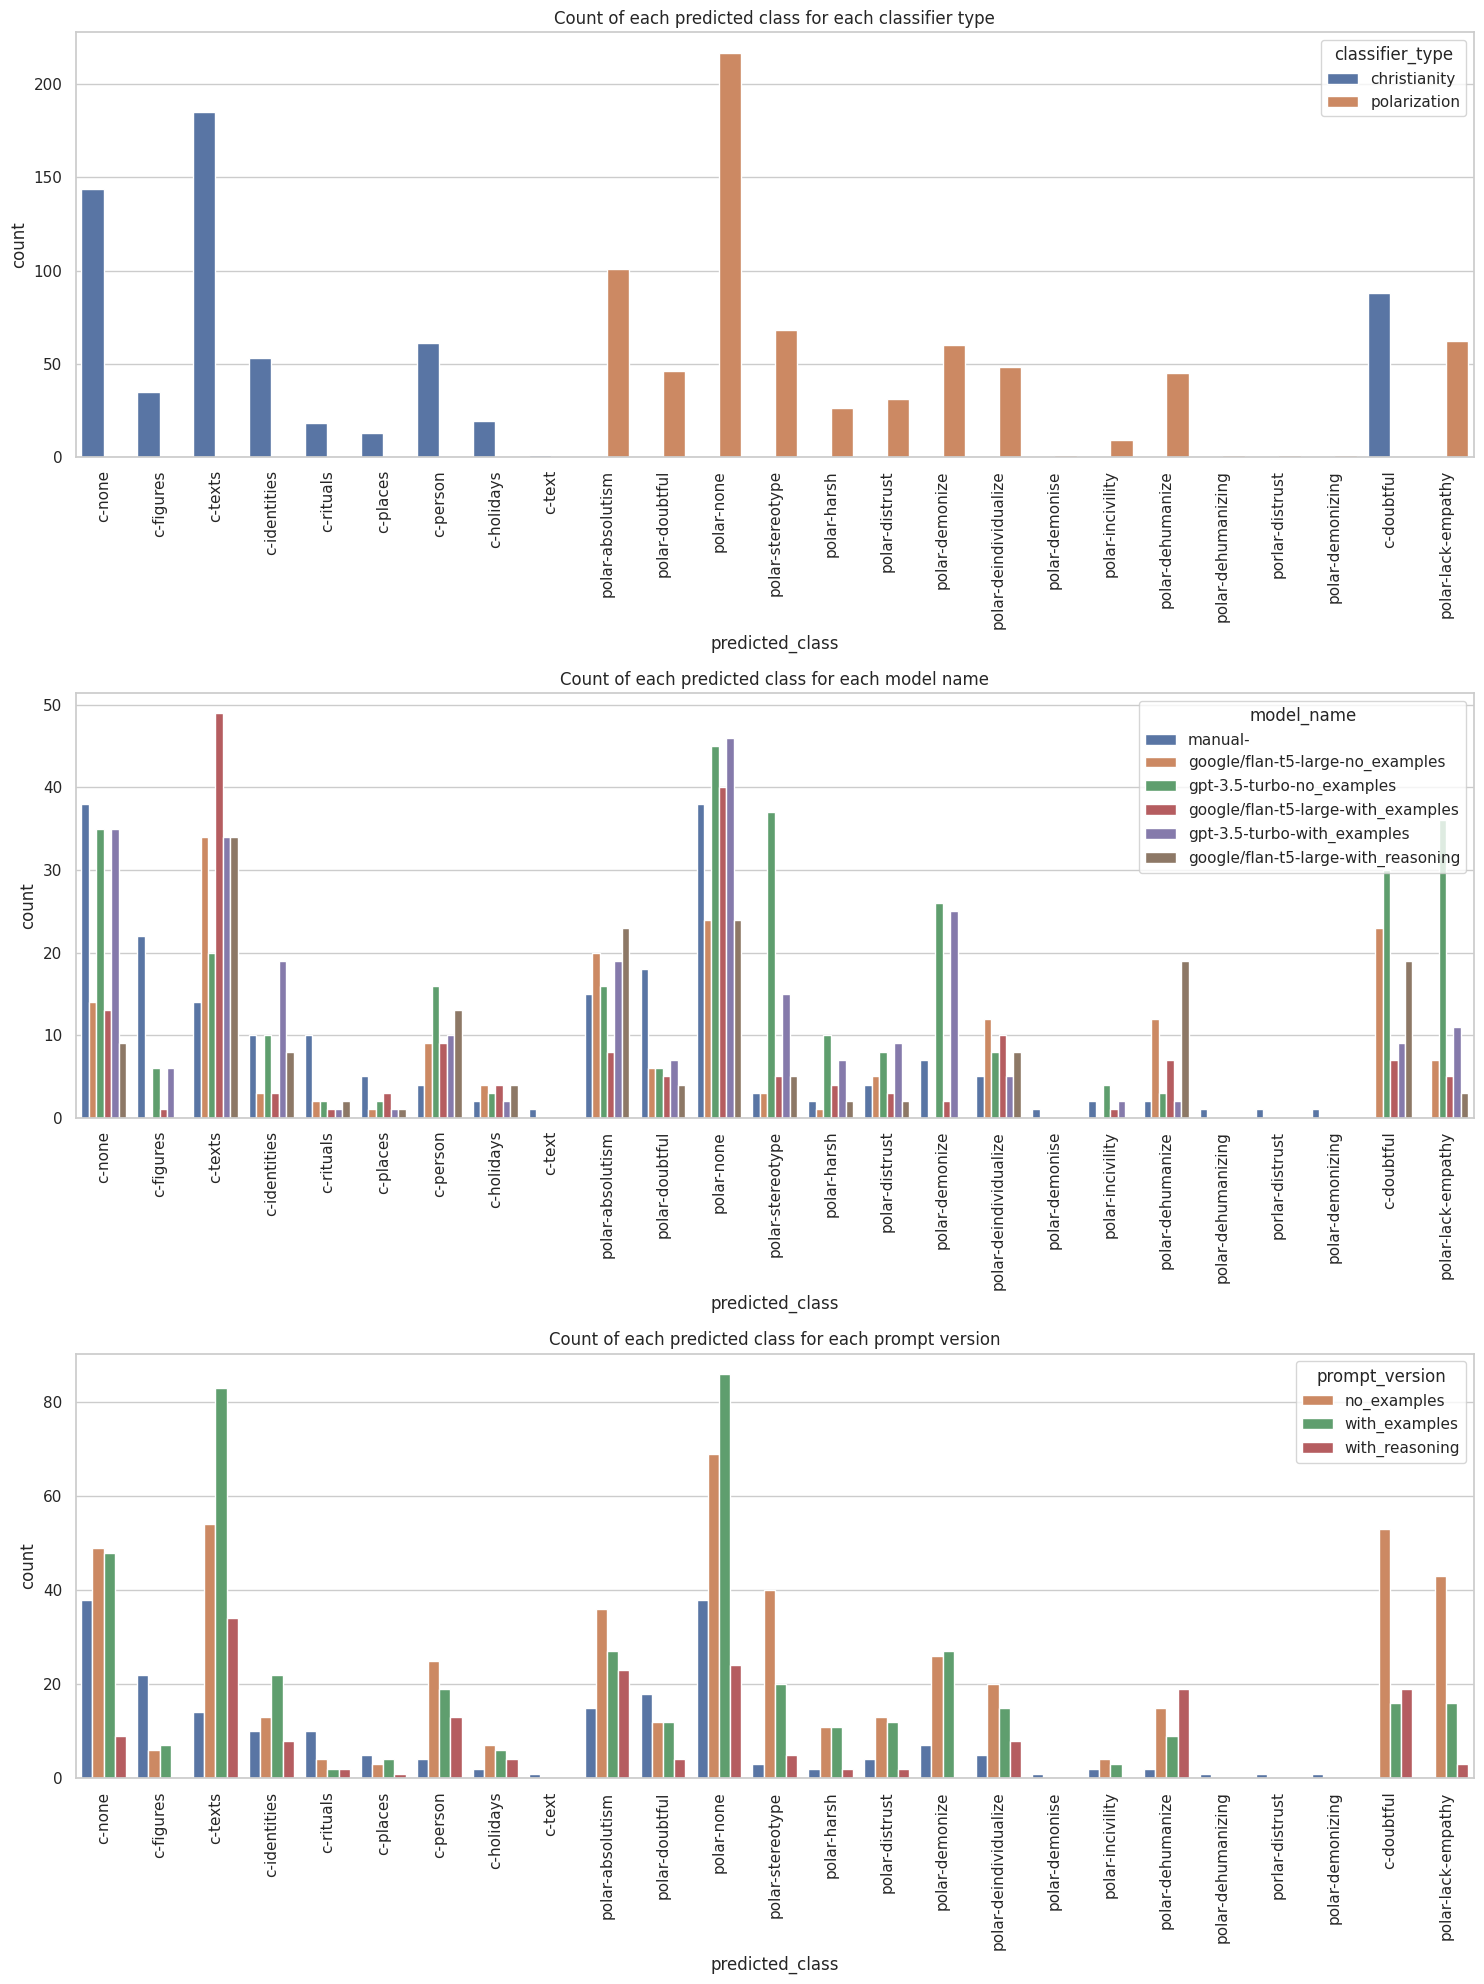

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plot
sns.set(style="whitegrid")

# Create a figure and axes objects
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Plot the count of each predicted_class for each classifier_type
sns.countplot(ax=axes[0], x="predicted_class", hue="classifier_type", data=results_samples_2)
axes[0].set_title('Count of each predicted class for each classifier type')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot the count of each predicted_class for each model_name
sns.countplot(ax=axes[1], x="predicted_class", hue="model_name", data=results_samples_2)
axes[1].set_title('Count of each predicted class for each model name')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Plot the count of each predicted_class for each prompt_version
sns.countplot(ax=axes[2], x="predicted_class", hue="prompt_version", data=results_samples_2)
axes[2].set_title('Count of each predicted class for each prompt version')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()
fig.savefig(OUTPUT_FOLDER + "analysis.png")

In [19]:
heat_map = results_samples_2.set_index(["classifier_type", "model_name", "tweet_id"])

In [20]:
heat_map.head()

Unnamed: 0 predicted_class  \
classifier_type model_name tweet_id                                          
christianity    manual-    1648189850749751296           0          c-none   
                           1662099067193942017           1          c-none   
                           1663968055985315841           2       c-figures   
                           1651349182425477120           3          c-none   
                           1651352206065676289           4       c-figures   

                                               prompt_version  \
classifier_type model_name tweet_id                             
christianity    manual-    1648189850749751296                  
                           1662099067193942017                  
                           1663968055985315841                  
                           1651349182425477120                  
                           1651352206065676289                  

                                                prediction_run_time  
classifier_type model_name tweet_id                                  
christianity    manual-    1648189850749751296  2023-07-12 12:00:00  
                           1662099067193942017  2023-07-12 12:00:00  
                           1663968055985315841  2023-07-12 12:00:00  
                           1651349182425477120  2023-07-12 12:00:00  
                           1651352206065676289  2023-07-12 12:00:00

In [21]:
result = pd.get_dummies(heat_map['predicted_class'])
result = result.groupby(["classifier_type", "model_name", "tweet_id"]).any()
result.head()

c-doubtful  \
classifier_type model_name                       tweet_id                          
christianity    google/flan-t5-large-no_examples 1642172103901282304       False   
                                                 1642173654829084673       False   
                                                 1642684346363412481       False   
                                                 1642898750636183555       False   
                                                 1643046932984610816       False   

                                                                      c-figures  \
classifier_type model_name                       tweet_id                         
christianity    google/flan-t5-large-no_examples 1642172103901282304      False   
                                                 1642173654829084673      False   
                                                 1642684346363412481      False   
                                                 1642898750636183555      False   
                                                 1643046932984610816      False   

                                                                      c-holidays  \
classifier_type model_name                       tweet_id                          
christianity    google/flan-t5-large-no_examples 1642172103901282304       False   
                                                 1642173654829084673       False   
                                                 1642684346363412481       False   
                                                 1642898750636183555       False   
                                                 1643046932984610816       False   

                                                                      c-identities  \
classifier_type model_name                       tweet_id                            
christianity    google/flan-t5-large-no_examples 1642172103901282304          True   
                                                 1642173654829084673         False   
                                                 1642684346363412481         False   
                                                 1642898750636183555         False   
                                                 1643046932984610816         False   

                                                                      c-none  \
classifier_type model_name                       tweet_id                      
christianity    google/flan-t5-large-no_examples 1642172103901282304   False   
                                                 1642173654829084673   False   
                                                 1642684346363412481   False   
                                                 1642898750636183555   False   
                                                 1643046932984610816    True   

                                                                      c-person  \
classifier_type model_name                       tweet_id                        
christianity    google/flan-t5-large-no_examples 1642172103901282304     False   
                                                 1642173654829084673     False   
                                                 1642684346363412481     False   
                                                 1642898750636183555      True   
                                                 1643046932984610816     False   

                                                                      c-places  \
classifier_type model_name                       tweet_id                        
christianity    google/flan-t5-large-no_examples 1642172103901282304     False   
                                                 1642173654829084673     False   
                                                 1642684346363412481     False   
                                                 1642898750636183555     False   
                                                 1643046932984610816     False 

In [61]:
christ_heat_map = heat_map.loc["christianity"]
christ_heat_map = pd.get_dummies(christ_heat_map['predicted_class'])
christ_heat_map = christ_heat_map.groupby(["model_name", "tweet_id"]).any()
christ_heat_map.head()
christ_heat_map["definatly_christianity"] = ~christ_heat_map["c-none"]
christ_heat_map["is_christianity"] = christ_heat_map["c-doubtful"] | christ_heat_map["c-none"] 

In [64]:
def get_accuracy_comparision(head_map_df):
    models = head_map_df.index.get_level_values(0).unique()
    columns = head_map_df.columns
    models_to_compare = list(itertools.permutations(models, 2))
    result = []
    for tuple in models_to_compare:
        df1 = head_map_df.loc[tuple[0]].sort_index()
        df2 = head_map_df.loc[tuple[1]].sort_index()
        # TODO Check that indexes are the same
        ac = {}
        for column in columns:
            ac[column] = metrics.accuracy_score(df1[column], df2[column])
        result.append(ac)
    return pd.DataFrame(result, index=pd.MultiIndex.from_tuples(models_to_compare))

In [77]:
christ_acc = get_accuracy_comparision(christ_heat_map)
christ_acc.loc["manual-"]

,c-doubtful,c-figures,c-holidays,c-identities,c-none,c-person,c-places,c-rituals,c-text,c-texts,definatly_christianity,is_christianity
google/flan-t5-large-no_examples,0.744444,0.755556,0.977778,0.855556,0.600000,0.877778,0.955556,0.866667,0.988889,0.644444,0.600000,0.544444
google/flan-t5-large-with_examples,0.922222,0.766667,0.977778,0.877778,0.611111,0.900000,0.933333,0.900000,0.988889,0.522222,0.611111,0.600000
google/flan-t5-large-with_reasoning,0.788889,0.755556,0.977778,0.822222,0.611111,0.833333,0.955556,0.866667,0.988889,0.644444,0.611111,0.577778
gpt-3.5-turbo-no_examples,0.666667,0.800000,0.988889,0.933333,0.833333,0.822222,0.944444,0.888889,0.988889,0.911111,0.833333,0.733333
gpt-3.5-turbo-with_examples,0.900000,0.822222,1.000000,0.855556,0.788889,0.888889,0.955556,0.877778,0.988889,0.777778,0.788889,0.844444


In [66]:
polar_heat_map = heat_map.loc["polarization"]
polar_heat_map = pd.get_dummies(polar_heat_map['predicted_class'])
polar_heat_map = polar_heat_map.groupby(["model_name", "tweet_id"]).any()
polar_heat_map.head()
polar_heat_map["definatly_polar"] = ~polar_heat_map["polar-none"]
polar_heat_map["is_polar"] = polar_heat_map["polar-doubtful"] | polar_heat_map["polar-none"] 

In [74]:
polar_acc = get_accuracy_comparision(polar_heat_map)
polar_acc.loc["manual-"]

,polar-absolutism,polar-dehumanize,polar-dehumanizing,polar-deindividualize,polar-demonise,polar-demonize,polar-demonizing,polar-distrust,polar-doubtful,polar-harsh,polar-incivility,polar-lack-empathy,polar-none,polar-stereotype,porlar-distrust,definatly_polar,is_polar
google/flan-t5-large-no_examples,0.833333,0.844444,0.988889,0.811111,0.988889,0.922222,0.988889,0.900000,0.777778,0.966667,0.977778,0.922222,0.711111,0.933333,0.988889,0.711111,0.622222
google/flan-t5-large-with_examples,0.833333,0.900000,0.988889,0.855556,0.988889,0.922222,0.988889,0.944444,0.788889,0.955556,0.988889,0.944444,0.711111,0.955556,0.988889,0.711111,0.700000
google/flan-t5-large-with_reasoning,0.777778,0.766667,0.988889,0.855556,0.988889,0.922222,0.988889,0.933333,0.777778,0.955556,0.977778,0.966667,0.755556,0.933333,0.988889,0.755556,0.622222
gpt-3.5-turbo-no_examples,0.788889,0.966667,0.988889,0.855556,0.988889,0.788889,0.988889,0.888889,0.733333,0.888889,0.933333,0.600000,0.700000,0.600000,0.988889,0.700000,0.688889
gpt-3.5-turbo-with_examples,0.822222,0.977778,0.988889,0.911111,0.988889,0.800000,0.988889,0.877778,0.766667,0.922222,0.977778,0.877778,0.755556,0.844444,0.988889,0.755556,0.766667


In [72]:
polar_acc.to_csv(OUTPUT_FOLDER + "polarisation_accuracy_analysis_v1.csv")
christ_acc.to_csv(OUTPUT_FOLDER + "christianity_accuracy_analysis_v1.csv")